In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import geopandas as gpd
from bs4 import BeautifulSoup
from prettytable import PrettyTable

In [20]:
url = "https://www.mohfw.gov.in/data/datanew.json"
headers = { }
response = requests.get(url, headers=headers)
if (response.status_code != 200):
    print(str(response.text.encode('utf8'))+"Something went wrong fetching the data")
    sys.exit()
data = json.loads(response.content)
df = pd.DataFrame(data)
df

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,14,5052,4976,62,43,5081,4976,62,35
1,1,Andhra Pradesh,6104,899812,886498,7210,6614,900805,886978,7213,28
2,3,Arunachal Pradesh,4,16845,16785,56,4,16845,16785,56,12
3,4,Assam,1816,218310,215390,1104,1846,218363,215413,1104,18
4,5,Bihar,1488,265194,262133,1573,1456,265268,262238,1574,10
5,6,Chandigarh,2746,26468,23345,377,2831,26733,23523,379,04
6,7,Chhattisgarh,20181,341516,317239,4096,22057,344624,318436,4131,22
7,8,Dadra and Nagar Haveli and Daman and Diu,158,3623,3463,2,166,3642,3474,2,26
8,10,Delhi,8029,659616,640575,11012,7429,660611,642166,11016,07
9,11,Goa,1429,57712,55455,828,1419,57839,55591,829,30


In [21]:
df['active']=df['active'].map(int)
df['positive']=df['positive'].map(int)
df['cured']=df['cured'].map(int)
df['death']=df['death'].map(int)
df['new_active']=df['new_active'].map(int)
df['new_positive']=df['new_positive'].map(int)
df['new_cured']=df['new_cured'].map(int)
df['new_death']=df['new_death'].map(int)

In [22]:
india_map = gpd.read_file(r'C://Users//surabhi//Downloads//india_administrative_state_boundary')
india_map

,gid,st_nm,tid,territory_,geometry
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,6,Chhattisgarh,None,None,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,7,Dadara & Nagar Havelli,None,None,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,8,Daman & Diu,None,None,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,9,Goa,None,None,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,10,Gujarat,None,None,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [23]:
india_map = india_map.rename(columns = {'st_nm':'state_name'})
india_map["state_name"].replace("Andaman & Nicobar Island","Andaman and Nicobar Islands", inplace = True)
india_map["state_name"].replace("NCT of Delhi","Delhi", inplace = True)
india_map["state_name"].replace("Telangana","Telengana", inplace = True)
india_map["state_name"].replace("Jammu & Kashmir","Jammu and Kashmir", inplace = True)
india_map["state_name"].replace("Arunanchal Pradesh","Arunachal Pradesh", inplace = True)

In [32]:
india_data = india_map.merge(df, on="state_name", how = 'inner')
india_data

,gid,state_name,tid,territory_,geometry,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,1,Andaman and Nicobar Islands,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",2,14,5052,4976,62,43,5081,4976,62,35
1,2,Arunachal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",3,4,16845,16785,56,4,16845,16785,56,12
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",4,1816,218310,215390,1104,1846,218363,215413,1104,18
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",5,1488,265194,262133,1573,1456,265268,262238,1574,10
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",6,2746,26468,23345,377,2831,26733,23523,379,04
5,6,Chhattisgarh,None,None,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",7,20181,341516,317239,4096,22057,344624,318436,4131,22
6,9,Goa,None,None,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",11,1429,57712,55455,828,1419,57839,55591,829,30
7,10,Gujarat,None,None,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",12,12041,303118,286577,4500,12263,305338,288565,4510,24
8,11,Haryana,None,None,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",13,9312,288714,276259,3143,9437,289694,277110,3147,06
9,12,Himachal Pradesh,None,None,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",14,2634,62981,59308,1039,2830,63320,59445,1045,02


<Figure size 432x288 with 0 Axes>

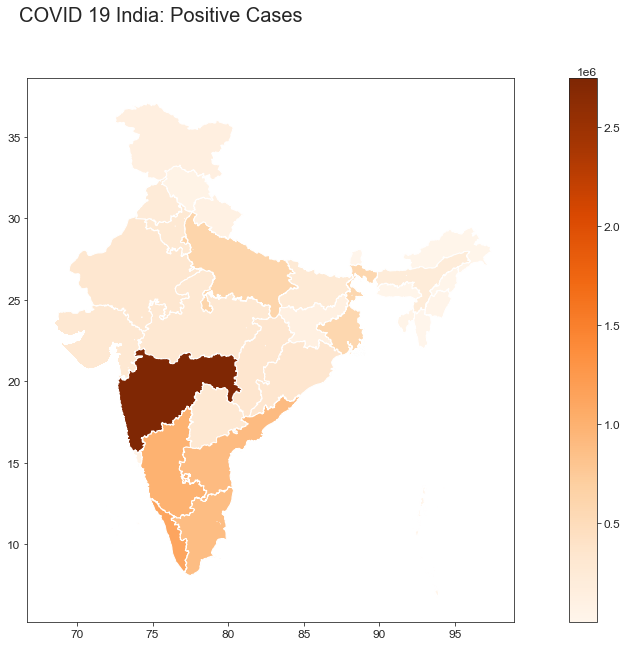

In [53]:
#Positive Cases Figure
fig = plt.figure()
india_data.plot(column = 'positive',figsize=(20, 10),cmap = "Oranges", legend=True)
plt.suptitle('COVID 19 India: Positive Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

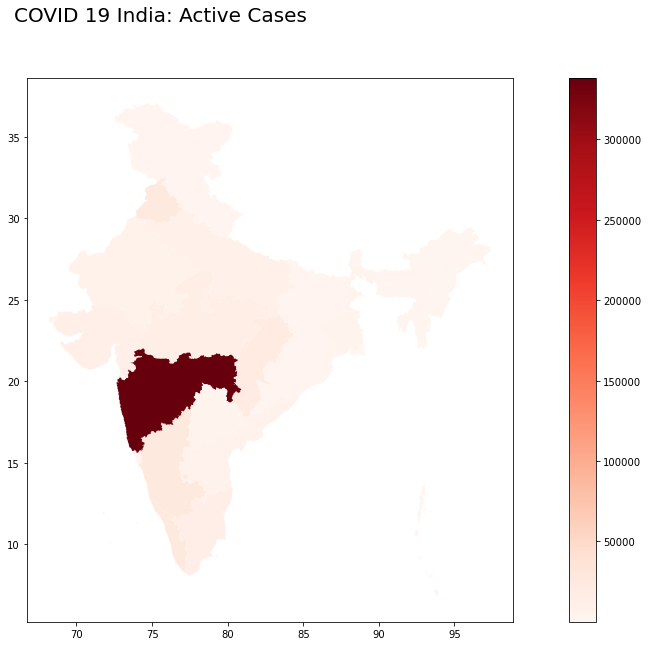

In [25]:
#Active Cases Figure
fig = plt.figure()
india_data.plot(column = 'active',figsize=(20, 10),cmap = "Reds", legend=True)
plt.suptitle('COVID 19 India: Active Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

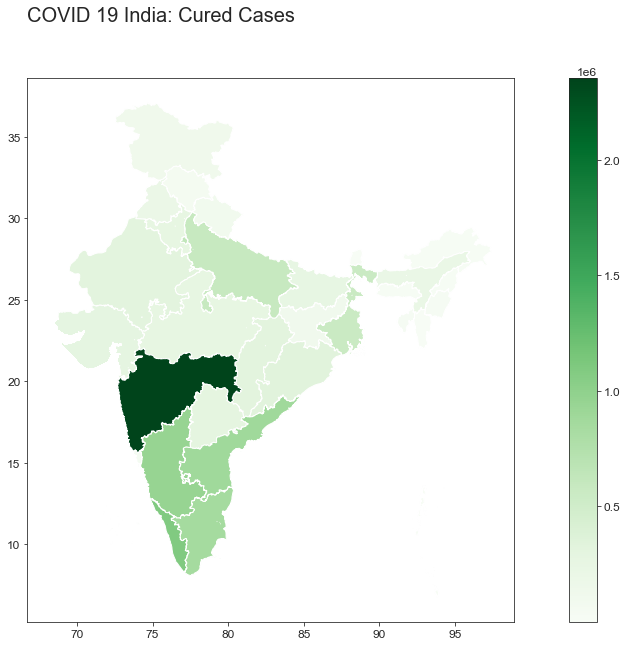

In [56]:
#Cured Cases Figure
fig = plt.figure()
india_data.plot(column = 'cured',figsize=(20, 10),cmap = "Greens", legend=True)
plt.suptitle('COVID 19 India: Cured Cases',fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

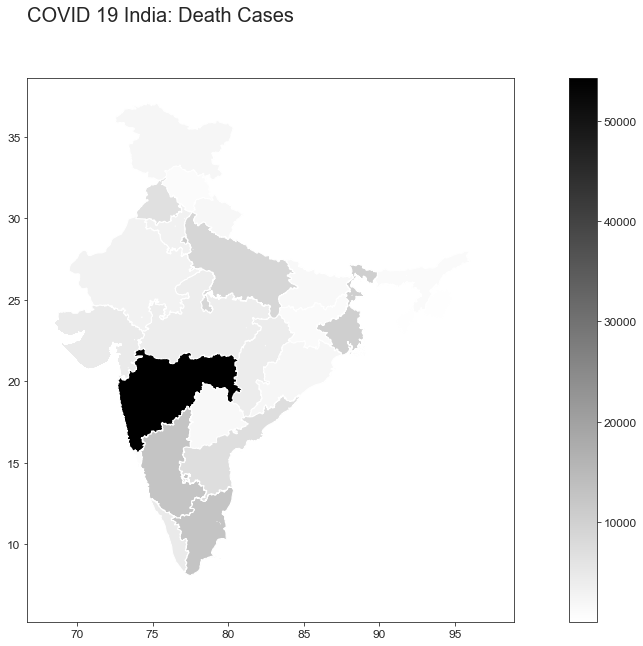

In [57]:
#Death Cases Figure
fig = plt.figure()
india_data.plot(column = 'death',figsize=(20, 10),cmap = "gray_r",  legend=True)
plt.suptitle('COVID 19 India: Death Cases',fontsize=20)
plt.show()

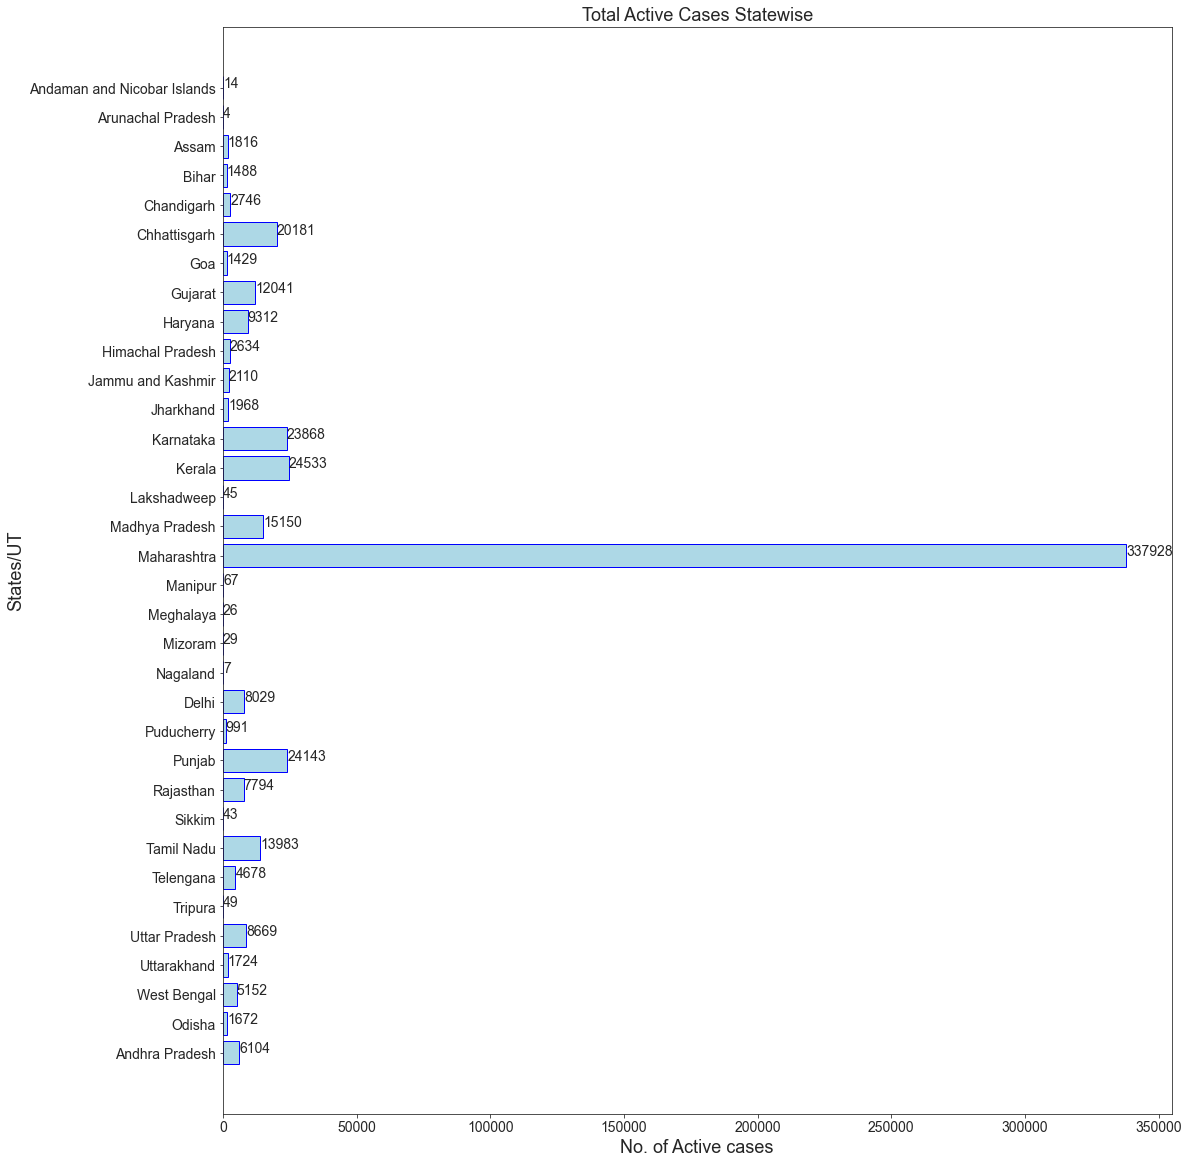

In [42]:
sns.set_style("ticks")
plt.figure(figsize = (17,20))
plt.barh(india_data["state_name"],     india_data["active"].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Active cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Active Cases Statewise', fontsize = 18 )
for index, value in enumerate(india_data["active"]):
    plt.text(value, index, str(value), fontsize = 14)
plt.show()

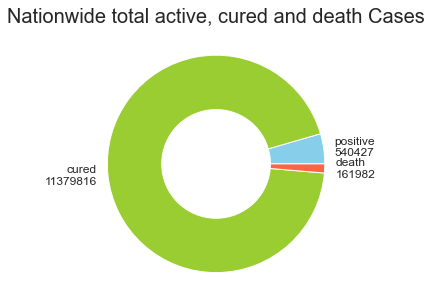

In [55]:
group_size = [sum(india_data['active']),
              sum(india_data['cured']),
              sum(india_data['death'])]
group_labels = ['positive\n' + str(sum(india_data['active'])),
                'cured\n' + str(sum(india_data['cured'])),
                'death\n' + str(sum(india_data['death']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide total active, cured and death Cases', fontsize = 20)
plt.show()